# 서울시 CCTV현황 분석 및 인구 현황 분석

### CCTV 설치현황

In [5]:
import pandas as pd

In [6]:
CCTV_Seoul = pd.read_excel("../Data/CCTV_in_Seoul_2018.xlsx")
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [7]:
CCTV_Seoul.tail()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


In [8]:
CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기관명       25 non-null     object 
 1   소계        25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [9]:
CCTV_Seoul.describe()

,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
count,25.000000,23.000000,23.000000,23.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2219.720000,580.478261,123.826087,194.217391,249.920000,226.880000,267.360000,299.440000,349.480000
std,967.646523,488.248248,81.895528,135.556414,285.271935,144.643908,160.365956,216.219618,218.601067
min,858.000000,8.000000,7.000000,8.000000,21.000000,59.000000,21.000000,1.000000,9.000000
25%,1586.000000,228.500000,83.500000,106.500000,87.000000,130.000000,155.000000,136.000000,195.000000
50%,1935.000000,481.000000,108.000000,185.000000,134.000000,180.000000,254.000000,273.000000,328.000000
75%,2775.000000,775.500000,158.000000,235.000000,241.000000,268.000000,326.000000,372.000000,448.000000
max,5221.000000,1944.000000,387.000000,599.000000,1326.000000,609.000000,765.000000,933.000000,830.000000


In [10]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [11]:
# CCTV_Seoul의 첫번째 컬럼 확인
CCTV_Seoul.columns[0]

'기관명'

In [12]:
# 기관명 -> 구별 로 변경
# CCTV_Seoul.columns[0] = '구별' 이라고 하면 오류남!
CCTV_Seoul.rename(columns={'기관명':'구별'},inplace=True)
CCTV_Seoul.head()



,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [13]:
# NaN을 확인하고 NaN을 0으로 대체하기
CCTV_Seoul.fillna(0,inplace=True)
CCTV_Seoul.tail()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9


---
### 인구현황

In [14]:
pop = pd.read_excel("../Data/population_in_Seoul_2020.xlsx",header=3)
pop.head(5)


,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.1/4,합계,4354006,10013781,4874995,5138786,9733655,4742217,4991438,280126,132778,147348,2.24,1518239
1,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073
2,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2.00,23794
3,2020.1/4,용산구,110895,246165,119961,126204,229579,110667,118912,16586,9294,7292,2.07,39439
4,2020.1/4,성동구,135643,307193,149891,157302,299042,146300,152742,8151,3591,4560,2.20,44728


In [15]:
pop_seoul = pop.loc[:,['자치구','계','계.1','계.2',"65세이상고령자"]]
pop_seoul.head(2)

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073


In [16]:

pop_seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx",
                    header=3,
                    usecols="B, D, G, J, N" # 엑셀이라 있음 거의 안쓸 듯 
                    )
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [17]:
#pop_seoul.rename({'계':"인구수","계.1":'한국인',"계.2":"고령자"},axis=1,inplace=True)
pop_seoul.columns = ['구별','인구수','한국인','외국인','고령자']
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [18]:
# 합계 행을 삭제
pop_seoul.drop(0, inplace=True)
pop_seoul.reset_index(drop=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


### CCTV 현황

In [19]:
# CCTV에서 소게로 오름차순 정렬
CCTV_Seoul.sort_values(by='소계',axis=0).head()


,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328


> CCTV 댓수가 적은 지역으로는 도봉구,중랑구,강북구,종로구,중구 순이다

In [20]:
# CCTV에서 소게로 내림차순 정렬
CCTV_Seoul.sort_values(by='소계',axis=0,ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


> CCTV 댓수가 많은 지역으로는 강남구,관악구,구로구,성북구,은평구 순이다

In [21]:
#### 최근 3년간 CCTV증가율 구해서 CCTV가 제일 많이 증가한 구를 검색 후 정렬


In [22]:
CCTV_Seoul.loc[:,'2016년':'2018년'].sum(axis=1)

0     1790
1      852
2      574
3      708
4     1984
5      835
6     1352
7      865
8      564
9      343
10     566
11     787
12     926
13     886
14     995
15    1428
16    1316
17     612
18    1316
19    1453
20     222
21     892
22     530
23     915
24     196
dtype: int64

In [23]:
CCTV_Seoul.columns

Index(['구별', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [24]:
CCTV_Seoul['최근증가율'] = CCTV_Seoul.loc[:,'2016년':'2018년'].sum(axis=1)\
                        /CCTV_Seoul.loc[:,'2011년 이전':'2015년'].sum(axis=1) * 100


In [25]:
CCTV_Seoul.sort_values('최근증가율',ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


> 결과를 보면 최근 3년간의 CCTV가 2015년 이전에 비해 가장 많이 증가한 곳은 중구,영등포구,성동구,금천구,광진구 순이다.

---
### 인구현황

In [26]:
# 구별 Data의 유효성 확인
len(pop_seoul['구별'].unique())

25

In [27]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


In [28]:
pop_seoul['외국인비율'] =  pop_seoul.apply(lambda x : (x['외국인']/x['인구수'])*100,axis=1)
pop_seoul['고령자비율'] =  pop_seoul.apply(lambda x : (x['고령자']/x['인구수'])*100,axis=1)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228
5,광진구,365990,350417,15573,48989,4.255034,13.385338


In [29]:
# 인구수가 제일 많은 지역은 Top5
pop_seoul.sort_values('인구수',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
23,강남구,549898,544804,5094,72602,0.926354,13.202812
11,노원구,535495,531037,4458,82682,0.832501,15.440294
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [30]:
# 외국인이 제일 많은 지역은 Top5
pop_seoul.sort_values('외국인',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
17,구로구,438308,405837,32471,67432,7.408261,15.384615
18,금천구,251370,232583,18787,38508,7.473843,15.319251
21,관악구,516662,499374,17288,76664,3.346095,14.838328
6,동대문구,362793,346156,16637,60367,4.585811,16.639516


In [31]:
# 외국인 비율이 높은 지역은 Top5
pop_seoul.sort_values('외국인비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
2,중구,136469,126175,10294,23794,7.543105,17.435462
18,금천구,251370,232583,18787,38508,7.473843,15.319251
17,구로구,438308,405837,32471,67432,7.408261,15.384615
3,용산구,246165,229579,16586,39439,6.737757,16.021368


In [32]:
# 고령자 정렬
pop_seoul.sort_values('고령자',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
11,노원구,535495,531037,4458,82682,0.832501,15.440294
12,은평구,482509,478019,4490,82245,0.930553,17.045278
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [33]:
# 고령자 비율 정렬
pop_seoul.sort_values('고령자비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,316750,312985,3765,61660,1.188635,19.466456
10,도봉구,333495,331238,2257,60023,0.676772,17.998171
2,중구,136469,126175,10294,23794,7.543105,17.435462
1,종로구,161984,151217,10767,28073,6.646953,17.330724
12,은평구,482509,478019,4490,82245,0.930553,17.045278


인구수가 제일 많은 지역은 송파구 이지만 영등포구가 제일 외국인이 많다.   
그리고 그 근처라고 할 수 있는 구로구, 금천구 등도 굉장히 외국인이 많다.   
송파구는 고령자가 제일 많지만 고령자의 비율은 높지 않은 것이 확인된다.
하지만 강북구, 도봉구, 중구, 종로구, 은평구의 경우는 
인구수 대비 고령자 비율이 많기 때문에 추후 고령화가 우려된다.

---
# CCTV와 인구현황 합치기


In [34]:
CCTV_Seoul.head(1)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379


In [35]:
pop_seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161984,151217,10767,28073,6.646953,17.330724


In [36]:
data_result = pd.merge(CCTV_Seoul,pop_seoul, on='구별',how='inner')
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [37]:
delColumn = data_result.columns[2:10]

for i in delColumn:
    del data_result[i]
data_result.head()


,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [38]:
data_result.set_index('구별',inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [39]:
import numpy as np

In [40]:
# 고령자 비율과 소계의 상관계수
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.44225083],
       [-0.44225083,  1.        ]])

In [41]:
# 고령자와 소계의 상관계수
np.corrcoef(data_result['고령자'],data_result['소계'])

array([[1.        , 0.28638538],
       [0.28638538, 1.        ]])

In [42]:
# 외국인 비율과 소계의 상관계수
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.06215538],
       [-0.06215538,  1.        ]])

In [43]:
# 외국인과 소계의 상관계수
np.corrcoef(data_result['외국인'],data_result['소계'])

array([[1.        , 0.17444235],
       [0.17444235, 1.        ]])

In [44]:
# 인구 수의 소계의 상관계수
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.38064812],
       [0.38064812, 1.        ]])

> 고령자 비율의 상관계수를 보면 역상관이 발생하고 이는 고령자가 아닌 젊은층 비율이 높은 곳에 CCTV가 많이 설치되는 경향을 보이며  
> 주로 인구수와 양의 상관을 보이고 있어 CCTV 댓수는 인구수에 비례하여 증가하는 경향을 보인다.

In [45]:

pop_seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx",
                    header=3,
                    usecols="B, D, G, J, N" # 엑셀이라 있음 거의 안쓸 듯 
                    )
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [46]:
#pop_seoul.rename({'계':"인구수","계.1":'한국인',"계.2":"고령자"},axis=1,inplace=True)
pop_seoul.columns = ['구별','인구수','한국인','외국인','고령자']
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [47]:
# 합계 행을 삭제
pop_seoul.drop(0, inplace=True)
pop_seoul.reset_index(drop=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


### CCTV 현황

In [48]:
# CCTV에서 소게로 오름차순 정렬
CCTV_Seoul.sort_values(by='소계',axis=0).head()


,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71,66.601942
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9,22.477064
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101,56.323061
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998


> CCTV 댓수가 적은 지역으로는 도봉구,중랑구,강북구,종로구,중구 순이다

In [49]:
# CCTV에서 소게로 내림차순 정렬
CCTV_Seoul.sort_values(by='소계',axis=0,ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486,72.106667
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643,78.008299
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367,43.091787


> CCTV 댓수가 많은 지역으로는 강남구,관악구,구로구,성북구,은평구 순이다

In [50]:
#### 최근 3년간 CCTV증가율 구해서 CCTV가 제일 많이 증가한 구를 검색 후 정렬


In [51]:
CCTV_Seoul.loc[:,'2016년':'2018년'].sum(axis=1)

0     1790
1      852
2      574
3      708
4     1984
5      835
6     1352
7      865
8      564
9      343
10     566
11     787
12     926
13     886
14     995
15    1428
16    1316
17     612
18    1316
19    1453
20     222
21     892
22     530
23     915
24     196
dtype: int64

In [52]:
CCTV_Seoul.columns

Index(['구별', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '최근증가율'],
      dtype='object')

In [53]:
CCTV_Seoul['최근증가율'] = CCTV_Seoul.loc[:,'2016년':'2018년'].sum(axis=1)\
                        /CCTV_Seoul.loc[:,'2011년 이전':'2015년'].sum(axis=1) * 100


In [54]:
CCTV_Seoul.sort_values('최근증가율',ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


> 결과를 보면 최근 3년간의 CCTV가 2015년 이전에 비해 가장 많이 증가한 곳은 중구,영등포구,성동구,금천구,광진구 순이다.

---
### 인구현황

In [55]:
# 구별 Data의 유효성 확인
len(pop_seoul['구별'].unique())

25

In [56]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


In [57]:
pop_seoul['외국인비율'] =  pop_seoul.apply(lambda x : (x['외국인']/x['인구수'])*100,axis=1)
pop_seoul['고령자비율'] =  pop_seoul.apply(lambda x : (x['고령자']/x['인구수'])*100,axis=1)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228
5,광진구,365990,350417,15573,48989,4.255034,13.385338


In [58]:
# 인구수가 제일 많은 지역은 Top5
pop_seoul.sort_values('인구수',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
23,강남구,549898,544804,5094,72602,0.926354,13.202812
11,노원구,535495,531037,4458,82682,0.832501,15.440294
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [59]:
# 외국인이 제일 많은 지역은 Top5
pop_seoul.sort_values('외국인',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
17,구로구,438308,405837,32471,67432,7.408261,15.384615
18,금천구,251370,232583,18787,38508,7.473843,15.319251
21,관악구,516662,499374,17288,76664,3.346095,14.838328
6,동대문구,362793,346156,16637,60367,4.585811,16.639516


In [60]:
# 외국인 비율이 높은 지역은 Top5
pop_seoul.sort_values('외국인비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
2,중구,136469,126175,10294,23794,7.543105,17.435462
18,금천구,251370,232583,18787,38508,7.473843,15.319251
17,구로구,438308,405837,32471,67432,7.408261,15.384615
3,용산구,246165,229579,16586,39439,6.737757,16.021368


In [61]:
# 고령자 정렬
pop_seoul.sort_values('고령자',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
11,노원구,535495,531037,4458,82682,0.832501,15.440294
12,은평구,482509,478019,4490,82245,0.930553,17.045278
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [62]:
# 고령자 비율 정렬
pop_seoul.sort_values('고령자비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,316750,312985,3765,61660,1.188635,19.466456
10,도봉구,333495,331238,2257,60023,0.676772,17.998171
2,중구,136469,126175,10294,23794,7.543105,17.435462
1,종로구,161984,151217,10767,28073,6.646953,17.330724
12,은평구,482509,478019,4490,82245,0.930553,17.045278


--- 
## 시각화

In [63]:
# data vis.
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt : 위에 코드랑 같은 내용임 
import seaborn as sns 
import folium 

# Warning 무시 
import warnings 
warnings.filterwarnings('ignore')

In [87]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [88]:
# 파일로 저장 
data_result.to_csv("../Data/CCTV_Result.csv", index=True)

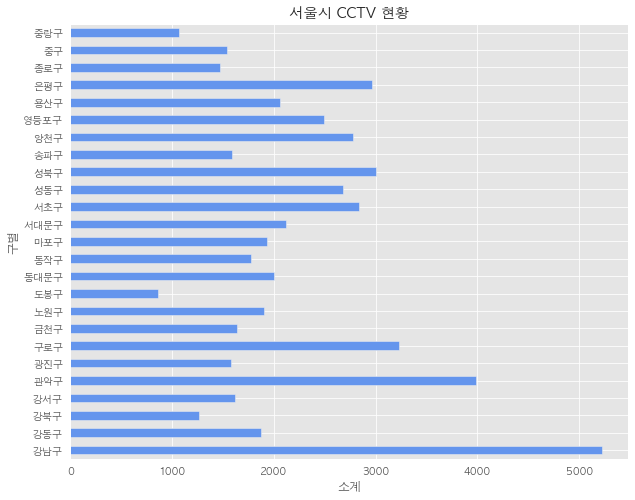

In [89]:
# 서울시 cctv 현황 차트 그리기 
plt.style.use('ggplot')
#sns.set_style('darkgrid')


data_result['소계'].plot(
            kind = 'barh',
            color = 'cornflowerblue',
            figsize = [10,8])
plt.title("서울시 CCTV 현황")
plt.ylabel('구별')
plt.xlabel('소계')
plt.show()

In [80]:
temp = data_result.sort_values('소계')

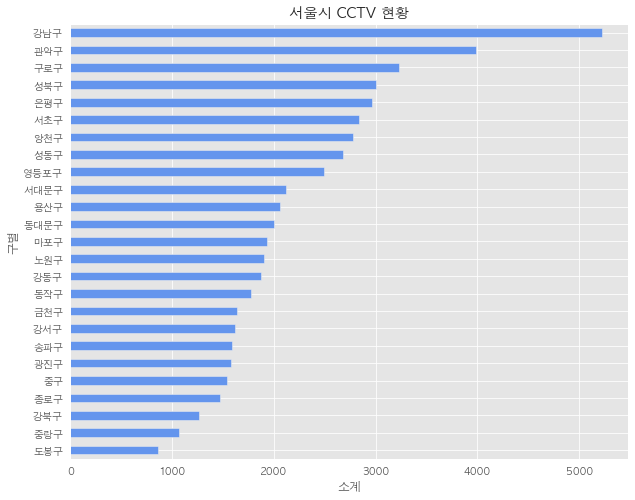

In [110]:
# 서울시 cctv 현황 차트 그리기 
plt.style.use('ggplot')


(temp['소계'].sort_values()).plot(
            kind = 'barh',
            color = 'cornflowerblue',
            figsize = [10,8])
plt.title("서울시 CCTV 현황")
plt.ylabel('구별')
plt.xlabel('소계')
plt.show()

### 인구대비 CCTV 비율

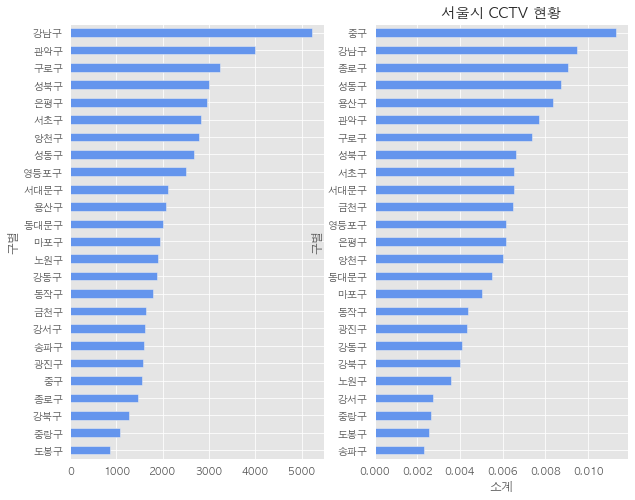

In [112]:

plt.style.use('ggplot')
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

(temp['소계'].sort_values()).plot(
            kind = 'barh',
            color = 'cornflowerblue',
            figsize = [10,8],
            ax = ax1
)

((data_result['소계']/data_result['인구수']).sort_values()).plot(
            kind = 'barh',
            color = 'cornflowerblue',
            figsize = [10,8],
            
            ax = ax2

)
plt.title("서울시 CCTV 현황")
plt.ylabel('구별')
plt.xlabel('소계')
plt.show()

강남구는 CCTV 수가 가장 많음에도 인구대비 CCTV  
CCTV가 낮은 지역 TOP 5 중 중구 종로구 2군데가 인구대비 CCTV가 많은 지역 TOP 5안에 들었다.  
이것은 인구수가 낮기 때문임을 알 수 있다.  

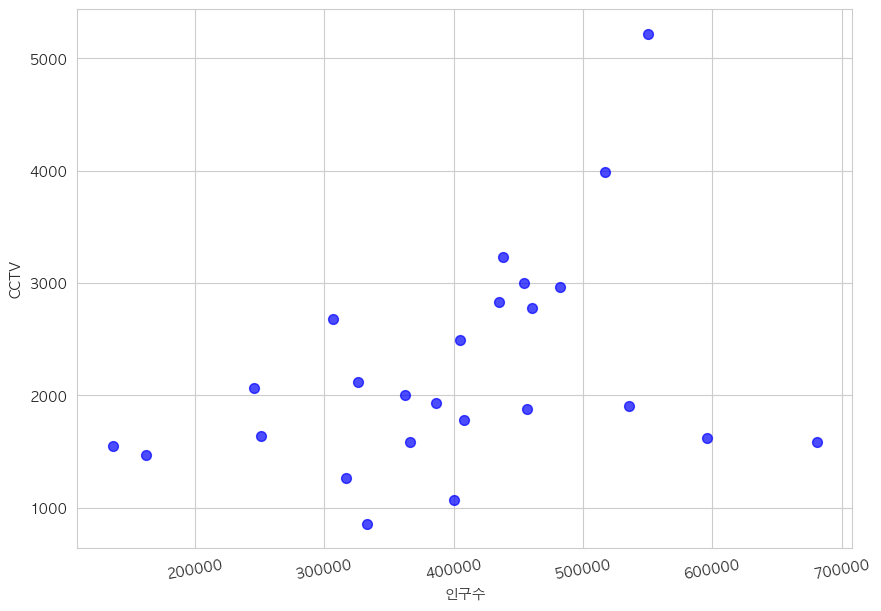

In [143]:
# 산점도를 이용한 시각화 (인구수와 소계)
plt.style.use('default')
sns.set_style('whitegrid')
rc('font', family='AppleGothic')

plt.figure(figsize=(10,7))

plt.scatter(
    x = data_result['인구수'],
    y = data_result['소계'],
    s = 50,
    c = 'blue',
    alpha= 0.7
)

plt.xticks(rotation = 10)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()
plt.style.use('default')


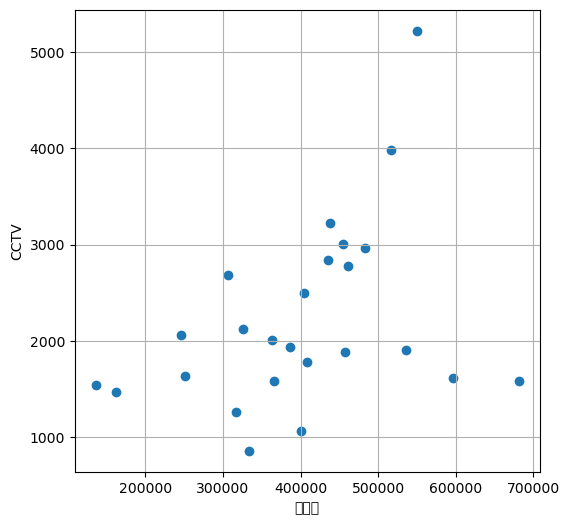

In [144]:
# 산점도를 이용한 시각화 (인구수와 소계)

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'])
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [146]:
# 인구수, 소계에 따른 기준직선(회귀선, 평균선) 만들기
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)
fp1

array([2.88522756e-03, 1.06403852e+03])

 
0.002885 x + 1064


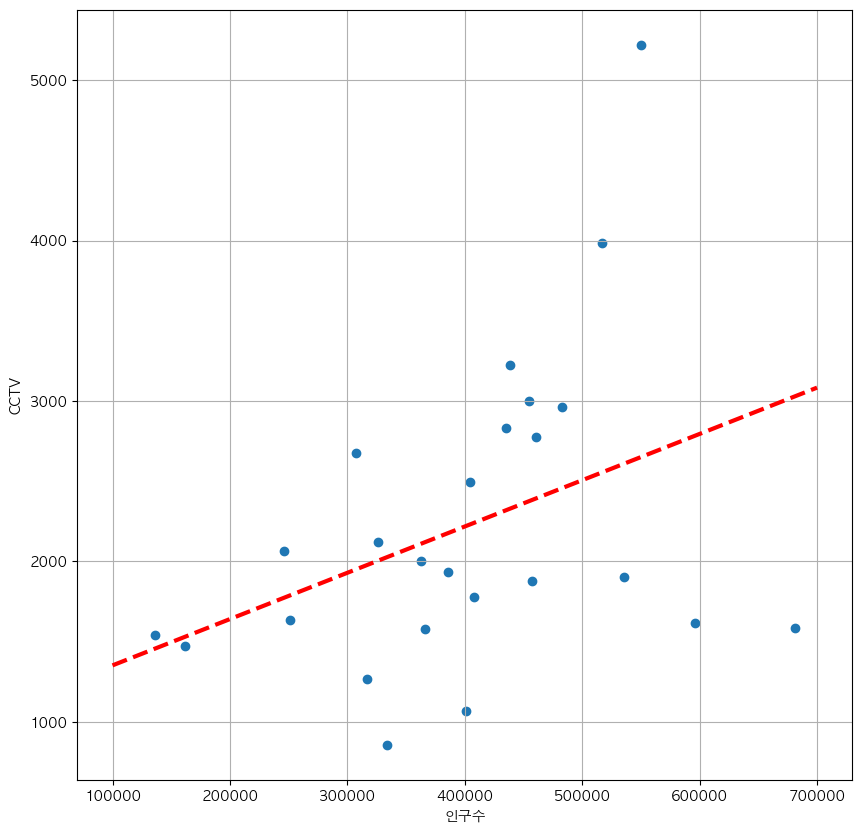

In [157]:
# x축 만들기 : 인구수 표현
fx = np.linspace(100000, 700000)

# y축 데이터 만들기 : CCTV 소계 표현
f1 = np.poly1d(fp1)

print(f1)
rc('font', family='AppleGothic')

plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'],data_result['소계'])
plt.plot(fx,f1(fx), ls = 'dashed', lw = 3, color = 'r') #dashed 점선 ls :linestyle lw : linewith

plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

> 이 직선은 CCTV 댓수에 기준값이 됩니다.   
> 이 직선을 기준으로 상위에 있는 점은 과하게 설치 된 것이고   
> 직선 보다 하위에 있는 점은 인구수에 비해 CCTV가 부족하다는 해석이 됩니다.   

In [196]:
# 기준선 구하기
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

# 기준치 구하기
f1 = np.poly1d(fp1) # 1d, 2d, 3d 3가지 존재
fp1

# 인구수
fx = np.linspace(100000, 700000)

# 소계에서 기준인구수 차이로 오차값 구하기
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

# 정렬 
df_sort = data_result.sort_values('오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,2570.380612
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,1442.540920
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,1430.274035
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,1168.247488
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,1165.777237


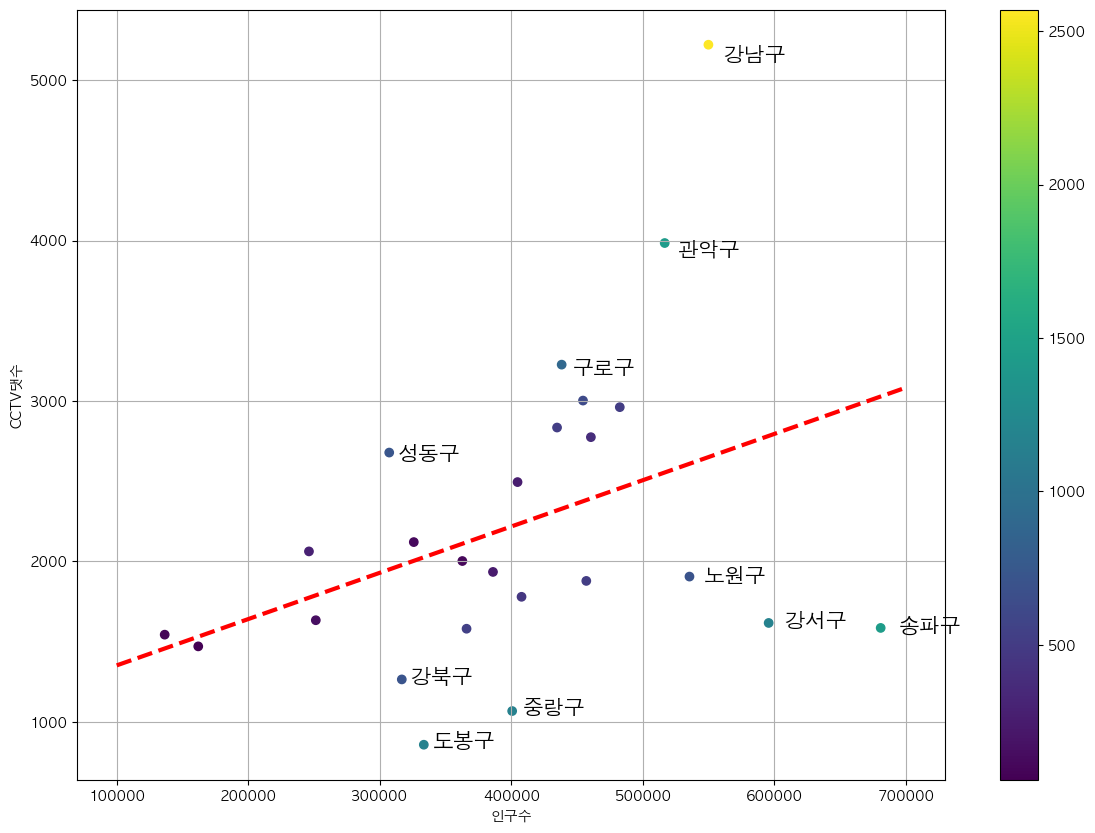

In [197]:
# 그래프에 텍스트와 Color
plt.figure(figsize=[14,10])
plt.scatter(data_result['인구수'], data_result['소계'],c = data_result['오차'])
plt.plot(fx,f1(fx), ls = 'dashed', lw = 3, color = 'r')

# 오차가 가장 큰 10개구에 텍스트 붙이기
for n in range(10):
    plt.text(df_sort['인구수'][n] *1.02,df_sort['소계'][n]*0.98 ,df_sort.index[n],\
            fontsize = 15)

plt.xlabel('인구수')
plt.ylabel('CCTV댓수')
plt.colorbar()
plt.grid()
plt.show()
